In [2]:
from lifelines.plotting import plot_lifetimes
import numpy as np
from numpy.random import uniform, exponential

$$f(x; \frac{1}{\beta}) = \frac{1}{\beta} \exp(-\frac{x}{\beta})$$

In [85]:
n = 25
current_time = 12
bound_plot = 30 + 1

np.random.seed(41)
actual_lifetimes = np.array([exponential(12) if uniform() < 0.5 else exponential(2) for i in range(n)])
actual_lifetimes

array([ 0.56630464,  0.08888518, 11.11202347, 13.2500986 ,  1.08525217,
        3.99271621,  4.57706611,  0.8646624 ,  0.75572985,  1.01570276,
        2.60726577,  6.00868609,  6.99354515, 10.51348136, 16.22744123,
        1.61917399, 12.35779027,  0.65979244,  4.12086372,  0.49202537,
       15.34007428,  7.40945009,  3.98651787,  4.14885603,  3.94324599])

#### Censure

In [86]:
observed_lifetimes = np.minimum(actual_lifetimes, current_time)
death_observed = actual_lifetimes < current_time

#### Plot

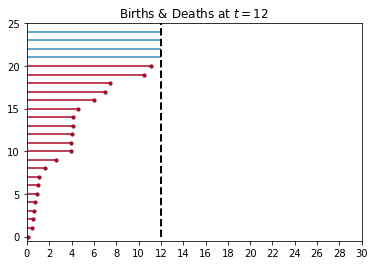

In [87]:
ax = plot_lifetimes(durations=observed_lifetimes, event_observed=death_observed)

ax.set_xlim(0, 25)
ax.vlines(current_time, 0, bound_plot, lw=2, linestyles='--')

ax.set_label('Time')
ax.set_title(f'Births & Deaths at $t={current_time}$')
ax.set_xticks(range(0, bound_plot, 2))
ax.plot();

#### Survival function properties:

1. $S(t) \in [0, 1] $
2. $F_{T}(t) = 1 - S(t)$
3. $S(t)$ is non-increasing

#### Hazard function:

$$
h(t) = \lim_{\delta t \to 0}\frac{{P(t \le T \le t+\delta t | T>t)}}{\delta t}
$$


### Kaplan-Meier Estimate

$$
\hat{S}(t) = \prod_{t_i<t}{\frac{n_i-d_i}{n_i}}
$$


* $d_i$ - number of death events at time $t$
* $n_i$ - number of subjects at risk of death prior to time $t$

In [90]:
from lifelines.datasets import load_dd
from lifelines import KaplanMeierFitter

kmf = KaplanMeierFitter()

df = load_dd()
df.sample(3)

,ctryname,cowcode2,politycode,un_region_name,un_continent_name,ehead,leaderspellreg,democracy,regime,start_year,duration,observed
1290,Portugal,235,235.0,Southern Europe,Europe,Marcelo Caetano,Marcelo Caetano.Portugal.1968.1973.Civilian Dict,Non-democracy,Civilian Dict,1968,6,1
1082,Myanmar,775,775.0,South-Eastern Asia,Asia,U Nu,U Nu.Myanmar.1960.1961.Parliamentary Dem,Democracy,Parliamentary Dem,1960,2,1
1134,New Zealand,920,920.0,Australia and New Zealand,Oceania,Norman Kirk,Norman Kirk.New Zealand.1972.1973.Parliamentar...,Democracy,Parliamentary Dem,1972,2,0


In [91]:
timeline = df['duration']
event = df['observed']

kmf.fit(durations=timeline, event_observed=event)

<lifelines.KaplanMeierFitter: fitted with 1808 observations, 340 censored>

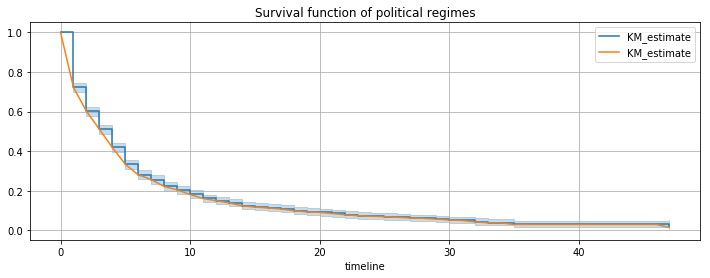

In [109]:
ax = plt.subplot(111)

kmf.plot(ax=ax)
kmf.survival_function_.plot(figsize=(12,4), grid=True, ax=ax)

ax.set_title('Survival function of political regimes')
ax.plot();


In [ ]:
ax = plt.subplot(111)

ax.set_title('Comparison of democratic & non-democratic governanments')
democracy = (df['democracy'] == 'Democracy')
kmf.fit(durations=timeline[democracy], event_observed=event[democracy], label='Democration')
kmf.plot(ax=ax, figsize=(10, 5), grid=True)
kmf.fit(durations=timeline[~democracy], event_observed=event[~democracy], label='Non-democratic authorities')
kmf.plot(ax=ax, grid=True)
plt.ylim(0,1)

plt.xticks(range(0, 50, 2))
plt.yticks(np.arange(0, 1, 0.1))
ax.plot();
